##Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

##Loading Datasets

In [21]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [22]:
print(type(data.Date[0]))

<class 'str'>


In [23]:
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [24]:
df.reset_index(inplace = True)

In [25]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


##Visualization

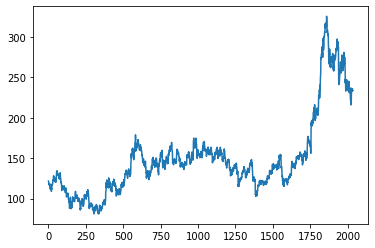

In [26]:
plt.plot(df['Close'])

In [27]:
close = df['Close']

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
close = scaler.fit_transform(np.array(close).reshape(-1,1))
close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

##Splitting the dataset

In [32]:
training_size = int(len(close)*0.70)
test_size = len(close) - training_size
train_data, test_data = close[0:training_size,:], close[0:test_size,:1] 

Convert array into a dataset matrix

In [38]:
def create_dataset(dataset,time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

Splitting data into train and test datasets

In [39]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [41]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

##Creating LSTM Model

In [45]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 278ms/step - loss: 0.0115 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 4s 198ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 4s 197ms/step - loss: 9.0969e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 4s 197ms/step - loss: 8.3762e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 195ms/step - loss: 8.0579e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 195ms/step - loss: 8.2108e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 4s 197ms/step - loss: 7.6931e-04 - val_loss: 9.8162e-04
Epoch 8/60
19/19 [==============================] - 4s 196ms/step - loss: 7.4516e-04 - val_loss: 9.5575e-04
Epoch 9/60
19/19 [==============================] - 4s 197ms/step - loss: 7.4700e-04 - val_loss: 9.4641e-04
Epoch 10/60
19/19 [==============================] - 4s 198

##Prediction and checking performance

In [49]:
test_predict = model.predict(X_test)

In [50]:
test_predicted = scaler.inverse_transform(test_predict)
test_predicted

array([[115.423004],
       [113.99878 ],
       [113.13496 ],
       [113.18007 ],
       [113.8916  ],
       [114.83843 ],
       [115.70241 ],
       [116.35764 ],
       [116.23336 ],
       [115.382515],
       [114.38644 ],
       [113.02368 ],
       [111.72874 ],
       [110.80187 ],
       [109.86892 ],
       [109.28099 ],
       [109.76536 ],
       [111.15207 ],
       [112.52402 ],
       [113.16384 ],
       [112.57191 ],
       [110.52552 ],
       [107.67247 ],
       [105.50464 ],
       [104.26028 ],
       [104.019516],
       [104.47036 ],
       [105.12794 ],
       [105.72775 ],
       [106.42915 ],
       [106.88434 ],
       [107.16106 ],
       [107.265015],
       [107.26919 ],
       [105.918755],
       [103.88687 ],
       [101.80276 ],
       [100.04008 ],
       [ 98.6232  ],
       [ 97.54126 ],
       [ 96.92362 ],
       [ 96.12914 ],
       [ 94.499374],
       [ 92.64658 ],
       [ 91.65548 ],
       [ 91.93339 ],
       [ 93.128845],
       [ 94.3

In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

134.50548580878706